In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

In [4]:
import os
data_path = "C:\\Users\\kolke\\Documents\\Machine Learning\\datasets\\cancer pred"
data_folders = os.listdir(data_path)

In [5]:
data_folders

['test', 'train', 'valid']

In [6]:
train_data_path = os.path.join(data_path, data_folders[1])
valid_data_path = os.path.join(data_path, data_folders[2])
test_data_path = os.path.join(data_path, data_folders[0])

In [7]:
os.listdir(train_data_path)

['adenocarcinoma left lower lobe',
 'large cell carcinoma left hilum',
 'normal',
 'squamous cell carcinoma left hilum']

In [8]:
class_names = os.listdir(train_data_path)

In [9]:
image_width = 128
image_height = 128

In [10]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_path,
    labels='inferred',
    label_mode='int',
    class_names=class_names,
    color_mode='grayscale',
    batch_size=32,
    image_size=(image_width, image_height),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 612 files belonging to 4 classes.


In [11]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    valid_data_path,
    labels='inferred',
    label_mode='int',
    class_names=class_names,
    color_mode='grayscale',
    batch_size=32,
    image_size=(image_width, image_height),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 72 files belonging to 4 classes.


In [12]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_path,
    labels='inferred',
    label_mode='int',
    class_names=class_names,
    color_mode='grayscale',
    batch_size=32,
    image_size=(image_width, image_height),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 315 files belonging to 4 classes.


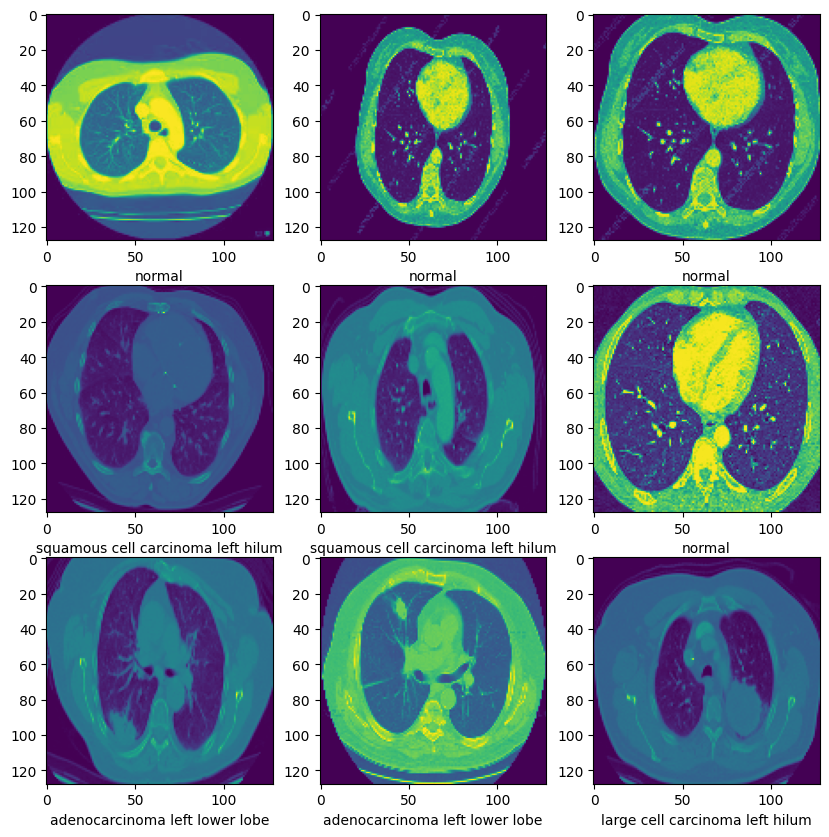

In [13]:
plt.figure(figsize = (10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.xlabel(class_names[labels[i]])
plt.show()

In [14]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape, labels_batch.shape)
    break

(32, 128, 128, 1) (32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
valid_data = validation_data.cache().prefetch(buffer_size = AUTOTUNE)

In [16]:
for images, labels in train_data.take(1):
    print(max(images[1].numpy().astype("uint8").tolist()))
    break

[[142], [92], [42], [17], [13], [36], [52], [48], [29], [15], [10], [9], [8], [8], [8], [8], [8], [7], [7], [8], [9], [17], [28], [25], [11], [1], [0], [0], [0], [0], [3], [12], [86], [129], [122], [120], [122], [127], [128], [127], [124], [126], [126], [126], [125], [128], [130], [129], [127], [128], [131], [129], [129], [130], [129], [130], [129], [127], [122], [127], [111], [111], [122], [123], [126], [124], [127], [128], [175], [142], [128], [121], [115], [112], [109], [111], [120], [125], [123], [123], [125], [127], [124], [127], [127], [129], [128], [127], [126], [122], [119], [117], [119], [120], [117], [120], [125], [130], [114], [77], [38], [14], [8], [9], [9], [8], [9], [10], [9], [11], [12], [18], [22], [30], [32], [32], [38], [49], [94], [141], [153], [149], [94], [57], [23], [9], [7], [8]]


In [17]:
data_augmentation = Sequential(
    [
        keras.layers.RandomFlip("horizontal",
                               input_shape = (image_height,
                                             image_width,
                                             1)),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.1),
    ]
)

C:\Users\kolke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
Classifier = Sequential(
    [
        keras.Input(shape = (image_width, image_height, 1)),
        data_augmentation,
        keras.layers.Rescaling(1./255),
        keras.layers.Resizing(height = 128, width = 128),
        Conv2D(16, 3, padding = "same", activation = "relu"),
        MaxPooling2D(),
        Conv2D(32, 3, padding = "same", activation = "relu"),
        MaxPooling2D(),
        Conv2D(64, 3, padding = "same", activation = "relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation = "relu"),
        Dense(len(class_names), name = "outputs")
    ]
)

In [19]:
Classifier.build()

In [20]:
Classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,121,092 (8.09 MB)

 Trainable params: 2,121,092 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
Classifier.compile(optimizer = "adam", 
                  loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  metrics = ["Accuracy"])

In [22]:
epoch = 25
history = Classifier.fit(train_data, validation_data = valid_data, epochs = epoch)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - Accuracy: 0.3098 - loss: 1.3321 - val_Accuracy: 0.4861 - val_loss: 1.1330
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - Accuracy: 0.4969 - loss: 1.0541 - val_Accuracy: 0.4306 - val_loss: 1.1485
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - Accuracy: 0.6124 - loss: 0.9619 - val_Accuracy: 0.5972 - val_loss: 0.8980
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - Accuracy: 0.6033 - loss: 0.9157 - val_Accuracy: 0.5833 - val_loss: 0.8526
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - Accuracy: 0.6208 - loss: 0.8608 - val_Accuracy: 0.5833 - val_loss: 0.9036
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - Accuracy: 0.6670 - loss: 0.7981 - val_Accuracy: 0.6250 - val_loss: 0.9439
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - Accuracy: 0.7031 - loss: 0.7736 - val_Accuracy: 0.6667 - val_loss: 0.9263
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - Accuracy: 0.7353 - loss: 0.6423 - val_Accuracy: 0.

In [23]:
print(history.history)

{'Accuracy': [0.35947713255882263, 0.5228758454322815, 0.6062091588973999, 0.5816993713378906, 0.6405228972434998, 0.6666666865348816, 0.7107843160629272, 0.7058823704719543, 0.7140522599220276, 0.7401960492134094, 0.741830050945282, 0.7614378929138184, 0.7745097875595093, 0.7712418437004089, 0.7745097875595093, 0.7598039507865906, 0.8169934749603271, 0.8006535768508911, 0.8235294222831726, 0.8202614188194275, 0.8120915293693542, 0.8366013169288635, 0.8545751571655273, 0.851307213306427, 0.8562091588973999], 'loss': [1.2669172286987305, 1.0725746154785156, 0.9654479026794434, 0.9244734644889832, 0.8596269488334656, 0.7690286040306091, 0.722536563873291, 0.6838510036468506, 0.6379112005233765, 0.59107506275177, 0.6386393904685974, 0.5736240744590759, 0.5458557605743408, 0.5153617858886719, 0.531260073184967, 0.5415059328079224, 0.4463552236557007, 0.4391617476940155, 0.4205983877182007, 0.4520830512046814, 0.45986589789390564, 0.4066936671733856, 0.38336315751075745, 0.3828509449958801,

In [24]:
acc = history.history["Accuracy"]
val_acc = history.history["val_Accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

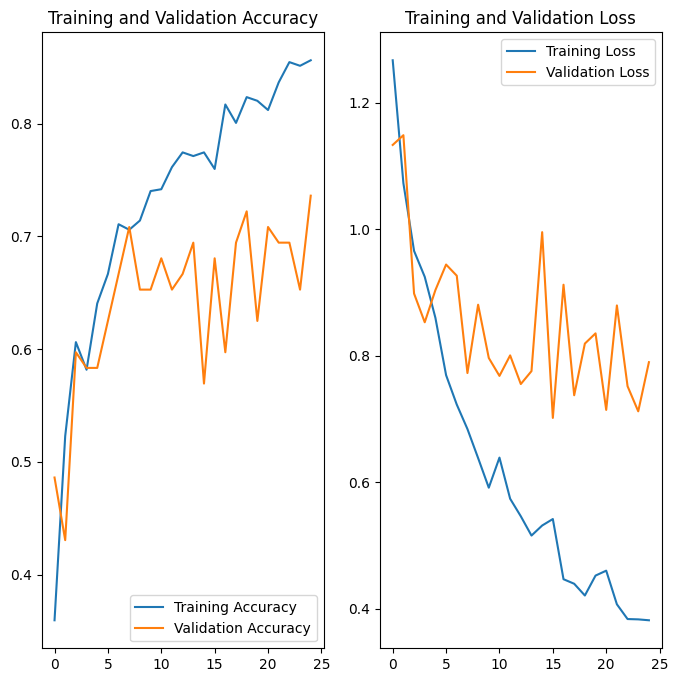

In [25]:
epochs_range = range(epoch)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
Classifier.save("Classifier.keras")